<a href="https://colab.research.google.com/github/sj-18-sys/India-s-renewable-energy/blob/main/renewable_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/renewable_energy_dataset.csv')

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df.columns

Index(['State', 'Year', 'Installed - Bio-Mass Power',
       'Installed - Small Hydro Power', 'Installed - Solar Power',
       'Installed - Wind Power', 'Zone', 'Installed - Waste to Energy',
       'Population', 'GSDP (crore INR)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          635 non-null    object 
 1   Year                           635 non-null    int64  
 2   Installed - Bio-Mass Power     635 non-null    float64
 3   Installed - Small Hydro Power  635 non-null    float64
 4   Installed - Solar Power        635 non-null    float64
 5   Installed - Wind Power         635 non-null    float64
 6   Zone                           635 non-null    object 
 7   Installed - Waste to Energy    635 non-null    float64
 8   Population                     635 non-null    int64  
 9   GSDP (crore INR)               635 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 49.7+ KB


In [ ]:
df.describe()

,Year,Installed - Bio-Mass Power,Installed - Small Hydro Power,Installed - Solar Power,Installed - Wind Power,Installed - Waste to Energy,Population,GSDP (crore INR)
count,635.00,635.00,635.00,635.00,635.00,635.00,635.00,635.00
mean,"2,015.11",187.23,115.69,734.54,798.90,3.67,"37,827,425.71","310,118.63"
std,5.46,459.45,215.78,"2,367.99","1,969.58",12.39,"45,665,770.98","393,517.33"
min,"2,006.00",0.00,0.00,0.00,0.00,0.00,"61,544.00",270.00
25%,"2,010.00",0.00,15.60,0.03,0.00,0.00,"2,160,035.50","22,265.50"
50%,"2,015.00",0.72,52.11,5.61,0.00,0.00,"27,166,195.00","155,709.00"
75%,"2,020.00",136.63,123.05,193.36,62.50,0.00,"61,238,996.50","460,625.50"
max,"2,024.00","2,643.19","1,280.73","25,471.72","11,722.72",82.37,"238,078,417.00","2,043,983.00"


In [ ]:
df.shape

(635, 10)

In [ ]:
df.isna().values.any()

np.False_

In [ ]:
df.duplicated().values.any()

np.False_

In [ ]:
df['Total Installed Capacity'] = (
    df['Installed - Bio-Mass Power'] +
    df['Installed - Small Hydro Power'] +
    df['Installed - Solar Power'] +
    df['Installed - Wind Power'] +
    df['Installed - Waste to Energy']
)

state_year_summary = df.groupby(['State', 'Year'])['Total Installed Capacity'].sum().reset_index()

state_year_summary

,State,Year,Total Installed Capacity
0,Andaman And Nicobar Islands,2006,5.35
1,Andaman And Nicobar Islands,2007,6.45
2,Andaman And Nicobar Islands,2008,6.45
3,Andaman And Nicobar Islands,2009,5.35
4,Andaman And Nicobar Islands,2010,5.35
...,...,...,...
630,West Bengal,2020,582.24
631,West Bengal,2021,586.95
632,West Bengal,2022,586.95
633,West Bengal,2023,586.95


In [ ]:
fig1 = px.line(state_year_summary,
        x= 'Year',
        y= 'Total Installed Capacity',
        color = 'State',
        title = 'State wise renewable energy capacity trend over the years 2006-2024')
fig1.show()

In [ ]:
df

,State,Year,Installed - Bio-Mass Power,Installed - Small Hydro Power,Installed - Solar Power,Installed - Wind Power,Zone,Installed - Waste to Energy,Population,GSDP (crore INR),Total Installed Capacity
0,Andaman And Nicobar Islands,2006,0.00,5.25,0.10,0.00,South,0.00,366589,"3,114.06",5.35
1,Andaman And Nicobar Islands,2007,0.00,5.25,0.10,1.10,South,0.00,369517,"3,114.06",6.45
2,Andaman And Nicobar Islands,2008,0.00,5.25,0.10,1.10,South,0.00,372344,"3,114.06",6.45
3,Andaman And Nicobar Islands,2009,0.00,5.25,0.10,0.00,South,0.00,375072,"3,114.06",5.35
4,Andaman And Nicobar Islands,2010,0.00,5.25,0.10,0.00,South,0.00,377699,"3,114.06",5.35
...,...,...,...,...,...,...,...,...,...,...,...
630,West Bengal,2020,319.92,98.50,162.65,0.00,East,1.17,97516138,"792,720.00",582.24
631,West Bengal,2021,319.92,98.50,166.00,0.00,East,2.53,98124996,"812,527.00",586.95
632,West Bengal,2022,319.92,98.50,166.00,0.00,East,2.53,98604137,"832,333.00",586.95
633,West Bengal,2023,319.92,98.50,166.00,0.00,East,2.53,99084008,"852,139.00",586.95


In [72]:
#Biomass power
top5_biomass = df.groupby('State')['Installed - Bio-Mass Power'].sum().sort_values(ascending=False).head(5)

In [71]:
#Small hydro power
top5_hydro =df.groupby('State')['Installed - Small Hydro Power'].sum().sort_values(ascending=False).head(5)

In [ ]:
#solar power
top5_solar= df.groupby('State')['Installed - Solar Power'].sum().sort_values(ascending=False).head(5)

In [ ]:
#wind power
top5_wind =df.groupby('State')['Installed - Wind Power'].sum().sort_values(ascending=False).head(5)

In [ ]:
#waste to power
top5_waste= df.groupby('State')['Installed - Waste to Energy'].sum().sort_values(ascending=False).head(5)

In [57]:
top5_combined = pd.concat([
    top5_biomass.rename('Capacity').reset_index().assign(Energy_Type='Bio-Mass Power'),
    top5_hydro.rename('Capacity').reset_index().assign(Energy_Type='Small Hydro Power'),
    top5_solar.rename('Capacity').reset_index().assign(Energy_Type='Solar Power'),
    top5_wind.rename('Capacity').reset_index().assign(Energy_Type='Wind Power'),
])

In [58]:
top5_combined

,State,Capacity,Energy_Type
0,Maharashtra,"27,920.61",Bio-Mass Power
1,Uttar Pradesh,"24,675.83",Bio-Mass Power
2,Karnataka,"20,972.42",Bio-Mass Power
3,Tamil Nadu,"13,561.40",Bio-Mass Power
4,Andhra Pradesh,"7,070.60",Bio-Mass Power
0,Karnataka,"19,389.20",Small Hydro Power
1,Himachal Pradesh,"12,703.14",Small Hydro Power
2,Maharashtra,"6,116.06",Small Hydro Power
3,Kerala,"3,583.63",Small Hydro Power
4,Uttarakhand,"3,434.44",Small Hydro Power


In [61]:
fig2 = px.bar(x= top5_combined.Energy_Type,
       y= top5_combined.Capacity,
       color= top5_combined.State,
              title= 'Top 5 states per energy type')
fig2.show()

In [64]:
numeric_cols = [
    'Installed - Bio-Mass Power',
    'Installed - Small Hydro Power',
    'Installed - Solar Power',
    'Installed - Wind Power',
    'Installed - Waste to Energy',
    'Population',
    'GSDP (crore INR)'
]

corr_matrix = df[numeric_cols].corr()


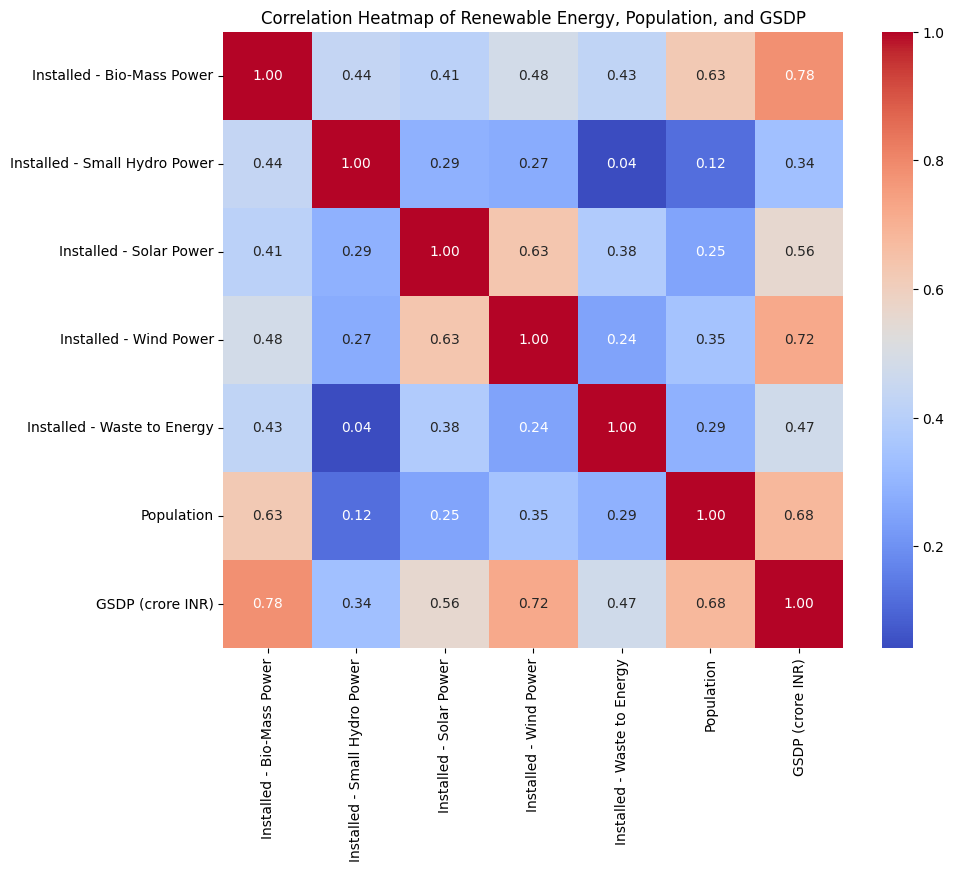

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Renewable Energy, Population, and GSDP')
plt.show()

In [73]:
melted_df = pd.melt(
    df,
    id_vars=['Zone', 'State'],
    value_vars=[
        'Installed - Bio-Mass Power',
        'Installed - Small Hydro Power',
        'Installed - Solar Power',
        'Installed - Wind Power',
        'Installed - Waste to Energy'
    ],
    var_name='Energy Type',
    value_name='Capacity'
)

grouped = melted_df.groupby(['Zone', 'State', 'Energy Type'])['Capacity'].sum().reset_index()

In [74]:
fig = px.sunburst(
    grouped,
    path=['Zone', 'State', 'Energy Type'],
    values='Capacity',
    title='Sunburst Chart of Renewable Energy Capacity by Zone, State, and Energy Type'
)

fig.show()


In [81]:
biomass= df.groupby('Zone')['Installed - Bio-Mass Power'].sum()
wind= df.groupby('Zone')['Installed - Wind Power'].sum()
solar= df.groupby('Zone')['Installed - Solar Power'].sum()
hydro= df.groupby('Zone')['Installed - Small Hydro Power'].sum()
waste= df.groupby('Zone')['Installed - Waste to Energy'].sum()

In [82]:
zone_wise = pd.concat([
    biomass.rename('Capacity').reset_index().assign(Energy_Type='Bio-Mass Power'),
    hydro.rename('Capacity').reset_index().assign(Energy_Type='Small Hydro Power'),
    solar.rename('Capacity').reset_index().assign(Energy_Type='Solar Power'),
    wind.rename('Capacity').reset_index().assign(Energy_Type='Wind Power'),
    waste.rename('Capacity').reset_index().assign(Energy_Type='Waste to energy'),
])

In [83]:
zone_wise

,Zone,Capacity,Energy_Type
0,Central,"5,586.45",Bio-Mass Power
1,East,"4,958.12",Bio-Mass Power
2,North,"32,811.32",Bio-Mass Power
3,North-East,795.93,Bio-Mass Power
4,South,"44,068.26",Bio-Mass Power
5,West,"30,672.05",Bio-Mass Power
0,Central,"2,696.79",Small Hydro Power
1,East,"4,493.31",Small Hydro Power
2,North,"23,942.84",Small Hydro Power
3,North-East,"5,461.24",Small Hydro Power


In [84]:
px.bar(zone_wise,
       x= 'Zone',
       y= 'Capacity',
       color= 'Energy_Type')